# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import date



# Read CSV

In [2]:
df_dailyweather = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Daily_Weather.csv')


# SneakPeak Data

## .head()

In [3]:
print('df_dailyweather')
print(df_dailyweather.head())


df_dailyweather
   Casual        Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371  2021-01-01     590          961                            -0.9   
1    2874  2021-01-02    2844         5718                             4.8   
2     495  2021-01-03    1133         1628                             0.9   
3     907  2021-01-04    2074         2981                             1.0   
4    1057  2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  
0                       2.3                      63                      10.6  
1                       7.6                      61                      19.1  
2                       3.9                      63                      13.0  
3                       4.1                       3                      13.3  
4                       4.0                      51                       9.2  


## .columns

In [4]:
print('df_dailyweather')
print(df_dailyweather.columns)


df_dailyweather
Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')


# ----------------------------------------------

# Daily Weather Dataset

## Cleaning / Organise

### Check for Null

In [5]:
df_dailyweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


### Check for Null again

In [6]:
df_dailyweather.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

### Check for Duplicated

In [7]:
df_dailyweather.duplicated().sum()

np.int64(0)

### Turn to lowercase and no spaces

In [8]:
df_dailyweather.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [9]:
df_dailyweather = df_dailyweather.rename(str.lower, axis=1)
df_dailyweather = df_dailyweather.rename(columns={'apparent_temperature_mean (°c)':'apparent_temperature_mean_(°c)','temperature_2m_mean (°c)':'temperature_2m_mean_(°c)', 'weathercode (wmo code)':'weathercode_(wmo code)', 'windspeed_10m_max (km/h)':'windspeed_10m_max_(km/h)' })
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)'],
      dtype='object')

### Datetime

In [10]:
df_dailyweather['date'] = pd.to_datetime(df_dailyweather['date'])
df_dailyweather['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


In [11]:
df_dailyweather['weathercode_(wmo code)'].unique()

array([63, 61,  3, 51,  2,  1,  0, 53, 73, 71, 75, 55, 65])

In [12]:
df_dailyweather['year'] = df_dailyweather['date'].dt.year
df_dailyweather['month'] = df_dailyweather['date'].dt.month
df_dailyweather['weekday'] = df_dailyweather['date'].dt.day_name()

### Weekday / Weekends

In [13]:

df_dailyweather['day_type'] = df_dailyweather['weekday'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df_dailyweather['day_type']


0       Weekday
1       Weekend
2       Weekend
3       Weekday
4       Weekday
         ...   
1090    Weekday
1091    Weekday
1092    Weekday
1093    Weekend
1094    Weekend
Name: day_type, Length: 1095, dtype: object

### Holidays

In [14]:
# Define custom WA state holidays (if needed)
wa_holidays = holidays.US()
# Add any Washington-specific ones manually
wa_holidays.append({date(2025, 4, 16): "Washington State Holiday Example"})


# Check if a date is a holiday
print(date(2025, 7, 4) in wa_holidays)  # True (Independence Day)
print(wa_holidays.get(date(2025, 7, 4)))  # 'Independence Day'

df_dailyweather['holiday'] = df_dailyweather['date'].dt.date.apply(lambda holiday: 1 if holiday in wa_holidays else 0)

df_dailyweather.loc[df_dailyweather['holiday'] == 0, 'is_holiday'] = 'No'
df_dailyweather.loc[df_dailyweather['holiday'] == 1, 'is_holiday'] = 'Yes'
df_dailyweather['is_holiday']


True
Independence Day


0       Yes
1        No
2        No
3        No
4        No
       ... 
1090     No
1091     No
1092     No
1093     No
1094     No
Name: is_holiday, Length: 1095, dtype: object

In [15]:
#Check year 2021
df_daily_weather_2021 = df_dailyweather[df_dailyweather['year'] == 2021].copy()
df_daily_weather_2021.loc[:,'weekday_num'] = df_daily_weather_2021['date'].dt.weekday
weekend_rows_2021 = df_daily_weather_2021[df_daily_weather_2021['weekday_num'] >= 5]

holiday_dates_weekend = weekend_rows_2021[weekend_rows_2021['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2021 there were {len(holiday_dates_weekend)} weekend days that were holidays")

#Check year 2022
df_daily_weather_2022 = df_dailyweather[df_dailyweather['year'] == 2022].copy()
df_daily_weather_2022.loc[:,'weekday_num'] = df_daily_weather_2022['date'].dt.weekday
weekend_rows_2022 = df_daily_weather_2022[df_daily_weather_2022['weekday_num'] >= 5]

holiday_dates_weekend = weekend_rows_2022[weekend_rows_2022['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2022 there were {len(holiday_dates_weekend)} weekend days that were holidays")

#Check year 2023
df_daily_weather_2023 = df_dailyweather[df_dailyweather['year'] == 2023].copy()
df_daily_weather_2023.loc[:,'weekday_num'] = df_daily_weather_2023['date'].dt.weekday
weekend_rows_2023 = df_daily_weather_2023[df_daily_weather_2023['weekday_num'] >= 5]

holiday_dates_weekend = weekend_rows_2023[weekend_rows_2023['holiday'] == 1]['date'].dt.date.unique()
print(f"In 2023 there were {len(holiday_dates_weekend)} weekend days that were holidays")

In 2021 there were 3 weekend days that were holidays
In 2022 there were 3 weekend days that were holidays
In 2023 there were 2 weekend days that were holidays


### Season

In [16]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return '1'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return '2'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return '3'
    else:
        return '4'

df_dailyweather['season'] = df_dailyweather['date'].apply(get_season)

# df_dailyweather.loc[df_dailyweather['season'] == 1, 'season'] = 'Winter'
# df_dailyweather.loc[df_dailyweather['season'] == 2, 'season'] = 'Spring'
# df_dailyweather.loc[df_dailyweather['season'] == 3, 'season'] = 'Summer'
# df_dailyweather.loc[df_dailyweather['season'] == 4, 'season'] = 'Fall'


df_dailyweather['season'].isnull().sum()

np.int64(0)

In [17]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 'Winter'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 'Summer'
    else:
        return 'Fall'

df_dailyweather['season_name'] = df_dailyweather['date'].apply(get_season)

df_dailyweather['season_name']


0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
1090    Winter
1091    Winter
1092    Winter
1093    Winter
1094    Winter
Name: season_name, Length: 1095, dtype: object

### Weather

In [18]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Deposits of rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail'
}

df_dailyweather['weather_desc'] = df_dailyweather['weathercode_(wmo code)'].map(weather_code_map)

### Turning Data into Categorical Values

In [19]:
df_dailyweather.head()

,casual,date,member,total_rides,apparent_temperature_mean_(°c),temperature_2m_mean_(°c),weathercode_(wmo code),windspeed_10m_max_(km/h),year,month,weekday,day_type,holiday,is_holiday,season,season_name,weather_desc
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,Friday,Weekday,1,Yes,1,Winter,Moderate rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,Saturday,Weekend,0,No,1,Winter,Slight rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,Sunday,Weekend,0,No,1,Winter,Moderate rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,Monday,Weekday,0,No,1,Winter,Overcast
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,Tuesday,Weekday,0,No,1,Winter,Light drizzle


In [20]:
df_dailyweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   casual                          1095 non-null   int64         
 1   date                            1095 non-null   datetime64[ns]
 2   member                          1095 non-null   int64         
 3   total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean_(°c)  1095 non-null   float64       
 5   temperature_2m_mean_(°c)        1095 non-null   float64       
 6   weathercode_(wmo code)          1095 non-null   int64         
 7   windspeed_10m_max_(km/h)        1095 non-null   float64       
 8   year                            1095 non-null   int32         
 9   month                           1095 non-null   int32         
 10  weekday                         1095 non-null   object        
 11  day_

In [21]:

# df_dailyweather['casual'] = df_dailyweather['casual'].astype('category')
# df_dailyweather['member'] = df_dailyweather['member'].astype('category')
# df_dailyweather.info()

## Research Domain Knowledge

### What is Washingtone like?

### What is the role of the e-bikes here?

### What is the current situation of bike rental companies?

### Why do people need ot use bike share?

### How many years ago did this was invented?


## EDA

#### Weather Conditions Analysis / Casual vs Member

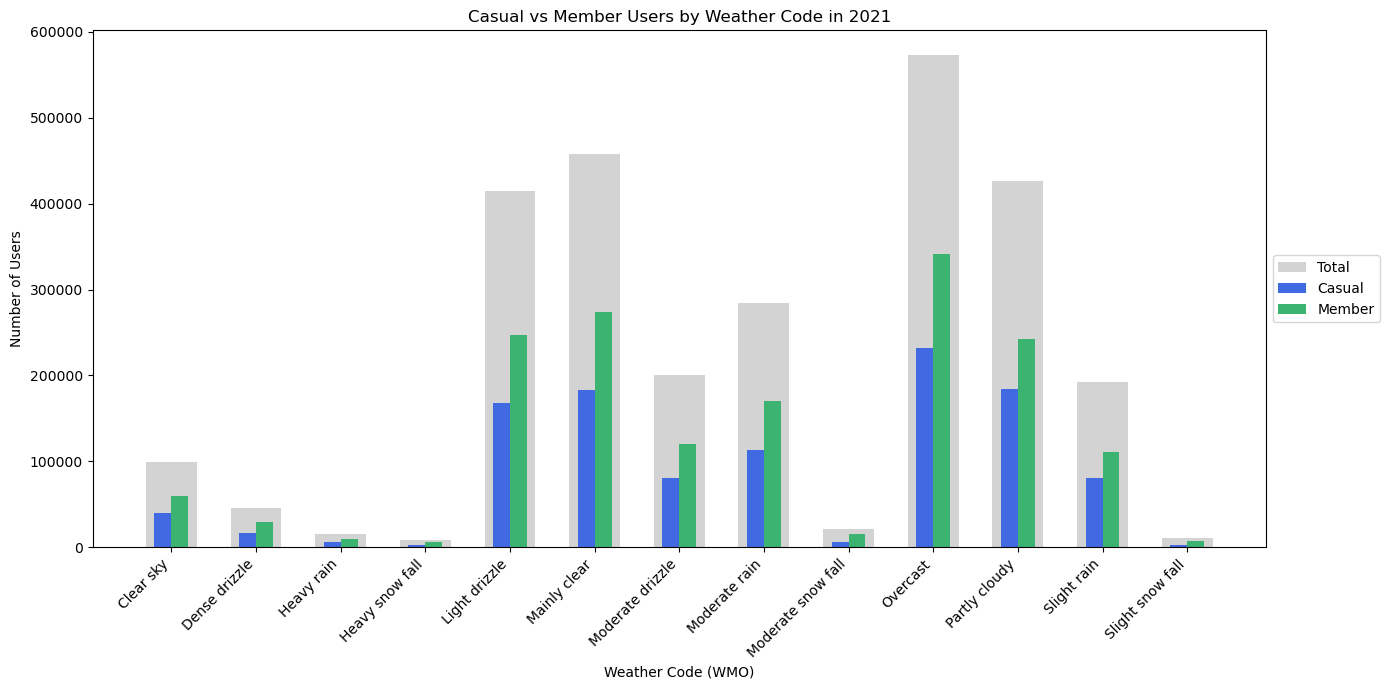

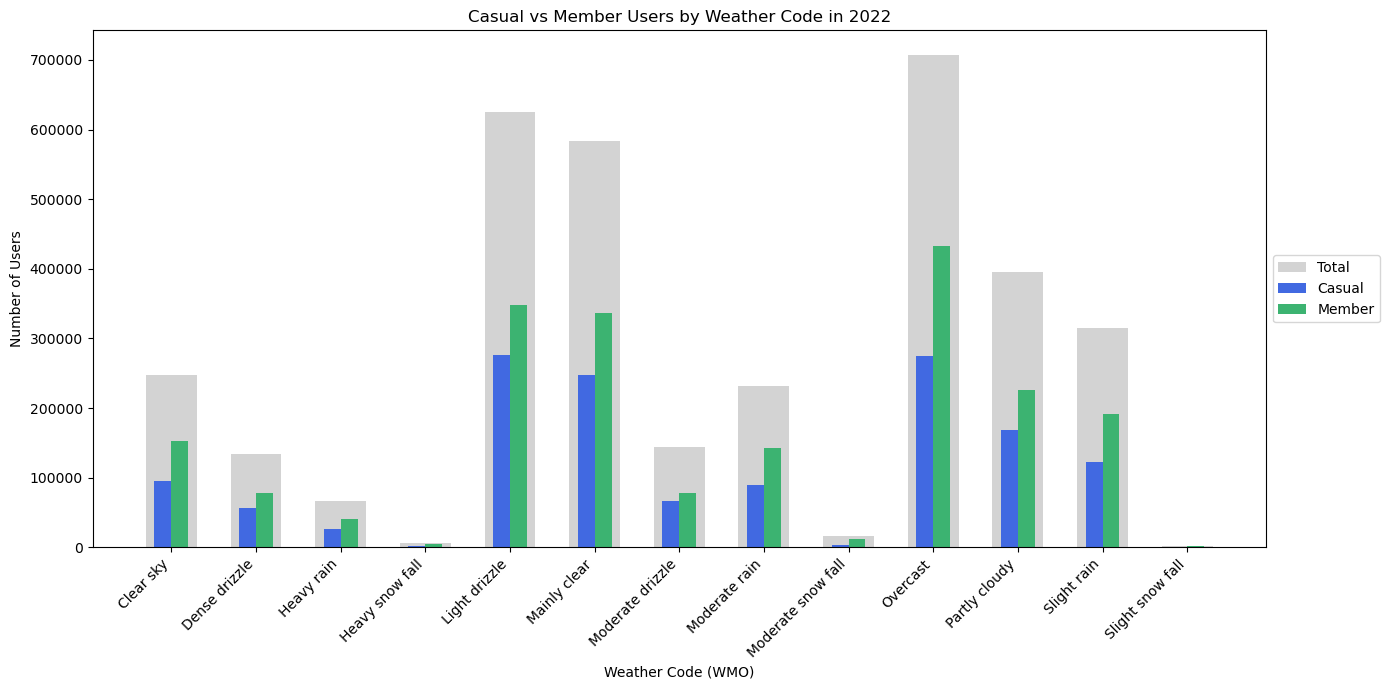

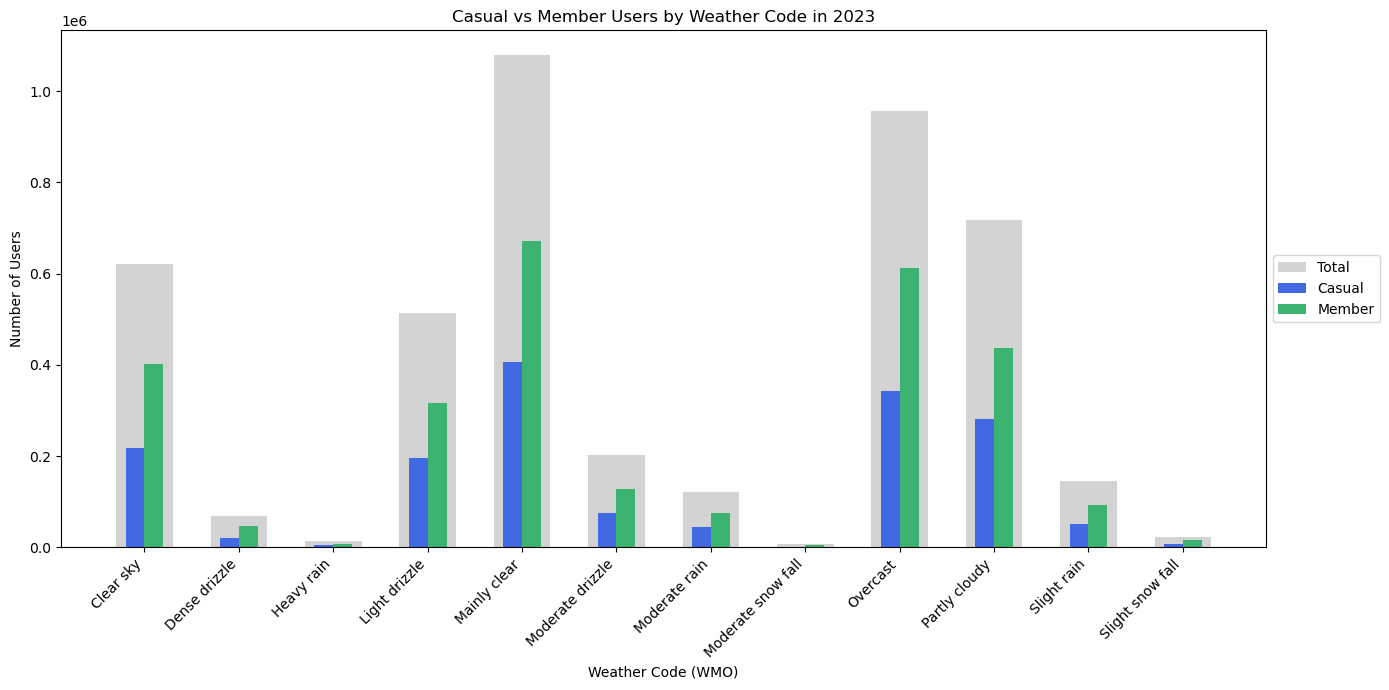

In [22]:
df_dailyweather['total_users'] = df_dailyweather['casual'] + df_dailyweather['member']

for year in df_dailyweather['year'].unique():
    data_year = df_dailyweather[df_dailyweather['year'] == year].copy()
    data_year['weather_desc'] = data_year['weathercode_(wmo code)'].map(weather_code_map)
    
    weather_users = data_year.groupby('weather_desc')[['casual', 'member', 'total_users']].sum().reset_index()

    x = np.arange(len(weather_users))
    width = 0.6  # total bar width (grey)
    inner_width = 0.2  # casual/member bar width (colored)

    fig, ax = plt.subplots(figsize=(14, 7))

    # Total users bar (grey, full width)
    ax.bar(x, weather_users['total_users'], width=width, color='lightgrey', label='Total')

    # Casual users bar (blue, narrower, left offset)
    ax.bar(x - inner_width/2, weather_users['casual'], width=inner_width, color='royalblue', label='Casual')

    # Member users bar (green, narrower, right offset)
    ax.bar(x + inner_width/2, weather_users['member'], width=inner_width, color='mediumseagreen', label='Member')

    ax.set_xticks(x)
    ax.set_xticklabels(weather_users['weather_desc'], rotation=45, ha='right')
    ax.set_xlabel('Weather Code (WMO)')
    ax.set_ylabel('Number of Users')
    ax.set_title(f'Casual vs Member Users by Weather Code in {year}')
    
    # Place legend outside on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()


#### Busiest Day of The week / Casual vs Member

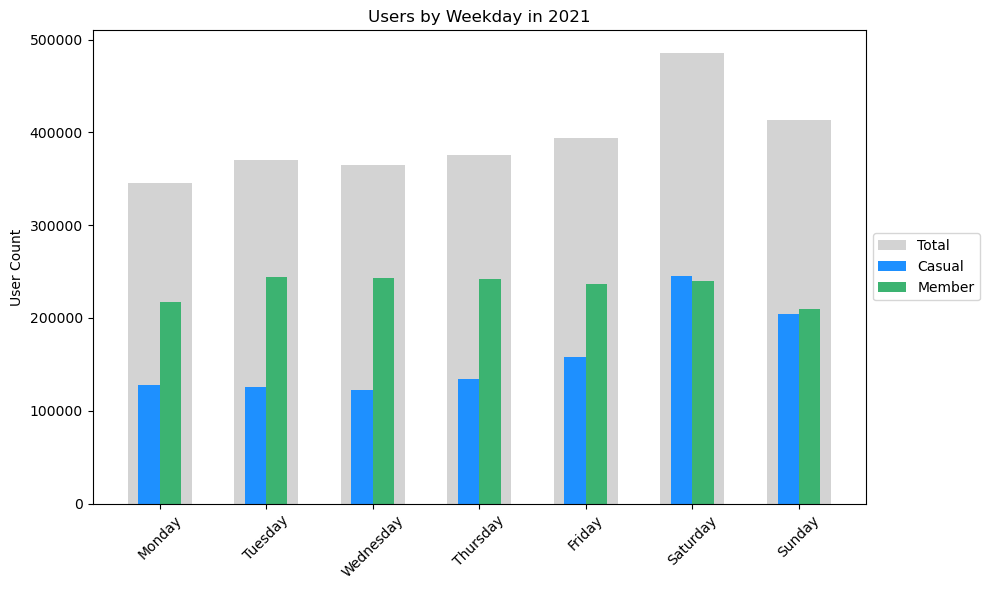

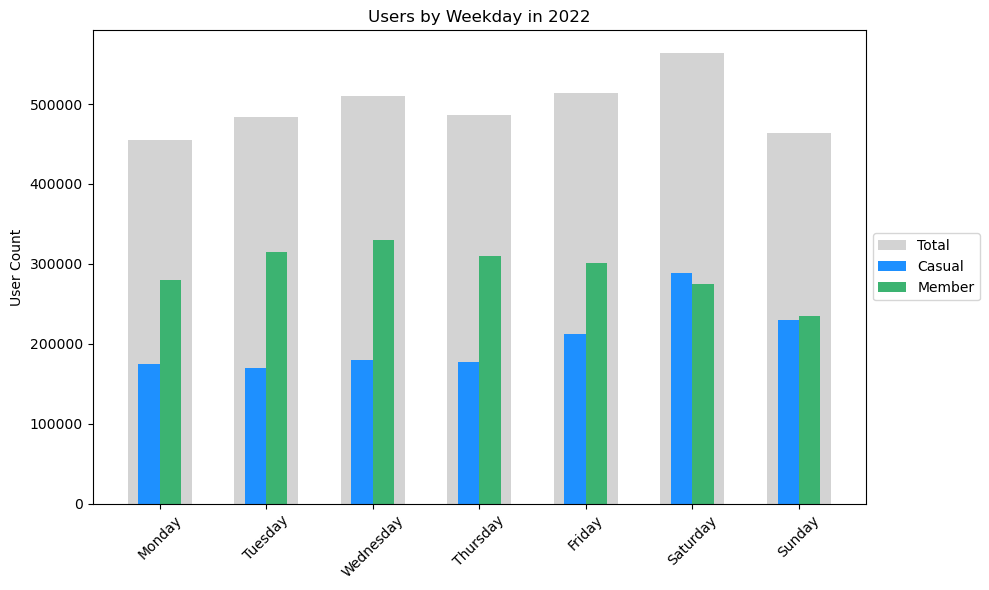

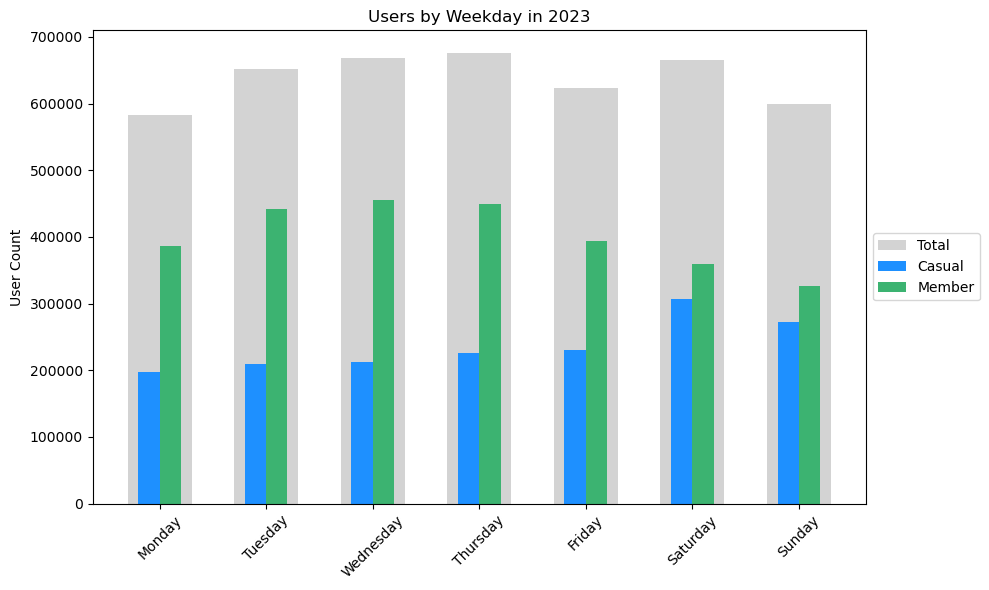

In [23]:
df_dailyweather['total_users'] = df_dailyweather['casual'] + df_dailyweather['member']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for year in df_dailyweather['year'].unique():
    data_year = df_dailyweather[df_dailyweather['year'] == year]

    summary = data_year.groupby('weekday')[['casual', 'member', 'total_users']].sum().reindex(weekday_order)

    x = np.arange(len(weekday_order))
    width = 0.6  # full length bar for the back. 
    inner_width = 0.2  # inner bars. 

    fig, ax = plt.subplots(figsize=(10, 6))

    # Total users bar, at the back
    ax.bar(x, summary['total_users'], width=width, color='lightgrey', label='Total')

    # Casual users bar infront. 
    ax.bar(x - inner_width/2, summary['casual'], width=inner_width, color='dodgerblue', label='Casual')

    # Member users bar infront. 
    ax.bar(x + inner_width/2, summary['member'], width=inner_width, color='mediumseagreen', label='Member')
        
    ax.set_xticks(x)
    ax.set_xticklabels(weekday_order, rotation=45)
    ax.set_ylabel('User Count')
    ax.set_title(f'Users by Weekday in {year}')
    ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


#### Temperature Analysis

##### Temperatures Over The year

In [24]:
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'total_users'],
      dtype='object')

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68162/626993130.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


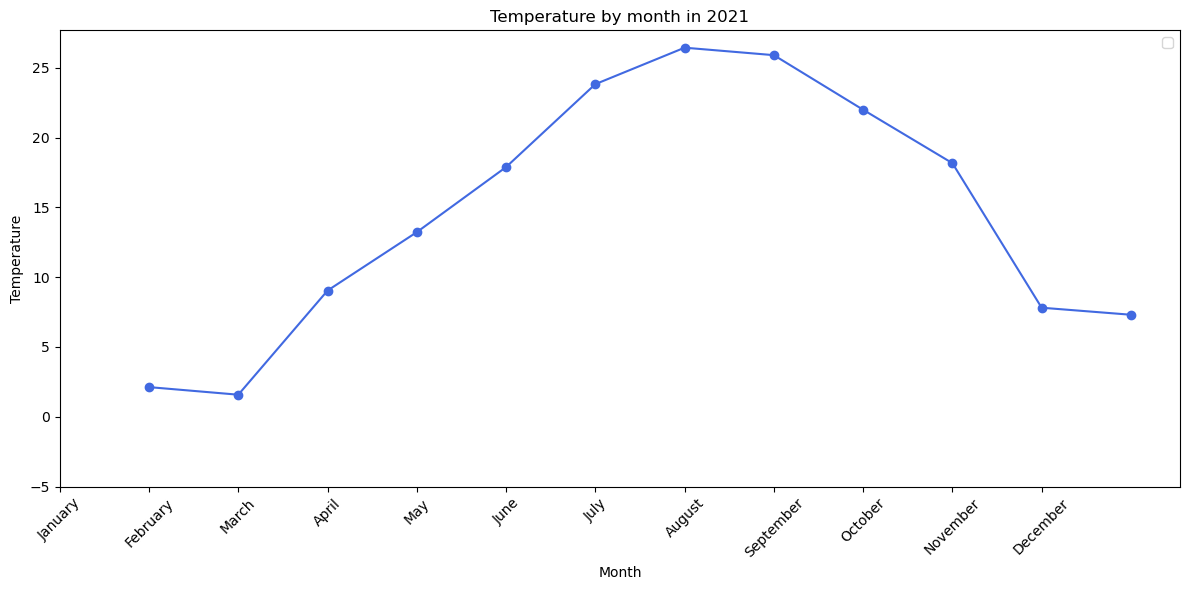

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68162/626993130.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


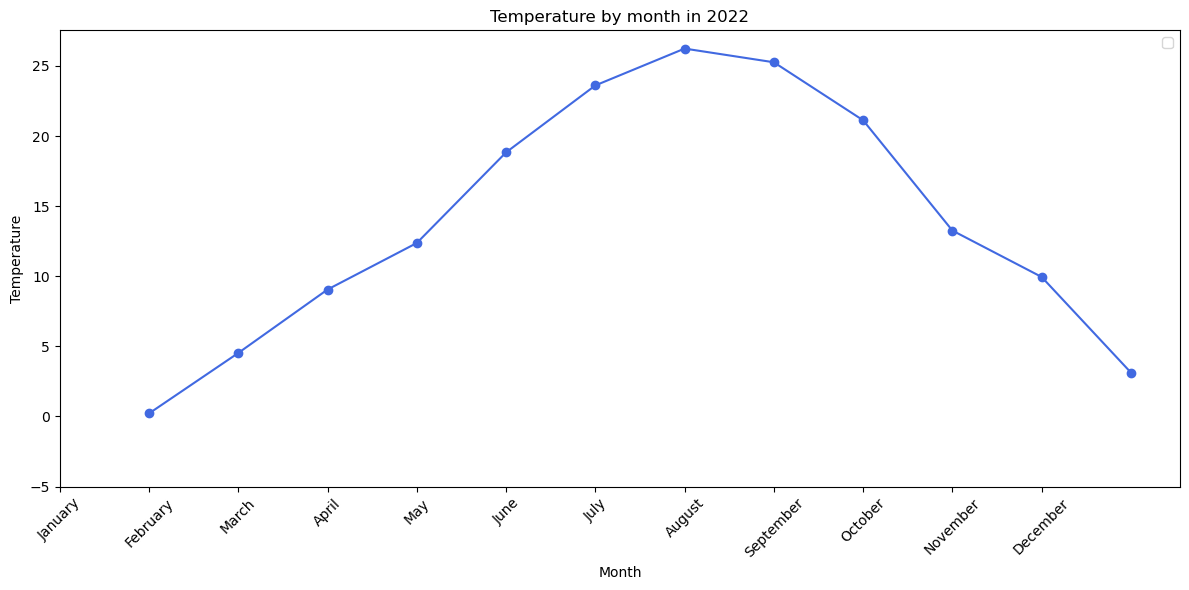

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_68162/626993130.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


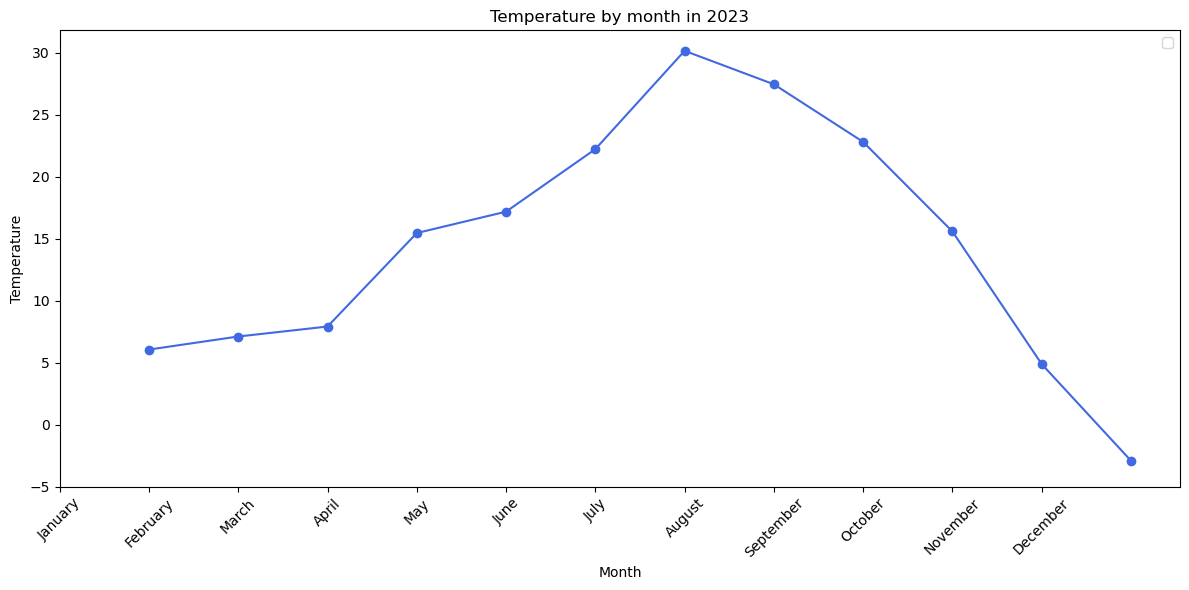

In [25]:
monthly_temp = df_dailyweather.groupby(['year', 'month'])['temperature_2m_mean_(°c)'].mean().reset_index()
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]


for year in df_dailyweather['year'].unique():
    yearly_data = monthly_temp[monthly_temp['year'] == year]
    months = yearly_data['month']
    x = np.arange(len(months))
    width = 0.4

    plt.figure(figsize=(12, 6))
    # plt.hist(x, yearly_data['temperature_2m_mean_(°c)'], width=width, label='Temperature', color='royalblue')
    plt.plot(months, yearly_data['temperature_2m_mean_(°c)'], marker='o', color='royalblue')

    plt.xticks(x, [month_names[m-1] for m in months], rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.ylim(bottom=-5)
    plt.title(f'Temperature by month in {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    

##### Rides during Hot Weather

In [26]:
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'total_users'],
      dtype='object')

In [27]:
df_dailyweather['apparent_temperature_mean_(°c)'].unique()

array([ -0.9,   4.8,   0.9,   1. ,   1.4,  -1.1,  -1.3,  -3.1,  -3.8,
        -1.8,  -2.2,   0.3,   0.6,  -1. ,  -1.9,  -2.1,  -3.3,  -1.7,
        -1.6,  -5.9,  -5.4,  -1.4,  -6.2,  -8.5,  -6. ,  -4.8,  -4.9,
        -5.1,  -5. ,  -4.5,  -0.6,  -2.8,  -3.5,  -0. ,  -6.8,  -4. ,
        -8.3,  -7.1,  -0.1,   4.2,   3.5,   4.3,   4.6,   5.2,  -2.7,
         1.3,   1.2,  -4.3,  -3. ,  -2.6,   6.7,   8.5,  12.7,  13.6,
         3.8,   5.4,   7. ,   1.7,   5. ,   5.9,   8.8,  12.2,  15.7,
        18.2,  13.3,  13.9,   5.5,  14.4,   2.5,  -2.5,   8.2,  10.8,
        13.8,  16.5,  12.3,  15.5,  18.6,  12. ,  11.3,   6.1,   7.7,
         9.6,  10.4,  13.2,   8.9,   1.5,   6.4,   9.1,   8.7,  17. ,
        23.7,  23.8,  17.1,  20.3,  24.7,  11.2,  11.4,   8.1,  10.7,
        12.8,  11.6,  12.1,  13.7,  15.2,  14. ,  16.7,  18.3,  21.4,
        22.3,  21.2,  26.9,  20.5,  20.6,  28.6,  25.8,   9. ,  15.3,
        18.8,  20.9,  24.2,  26.4,  28.7,  31. ,  31.2,  29.7,  29. ,
        21.9,  27. ,

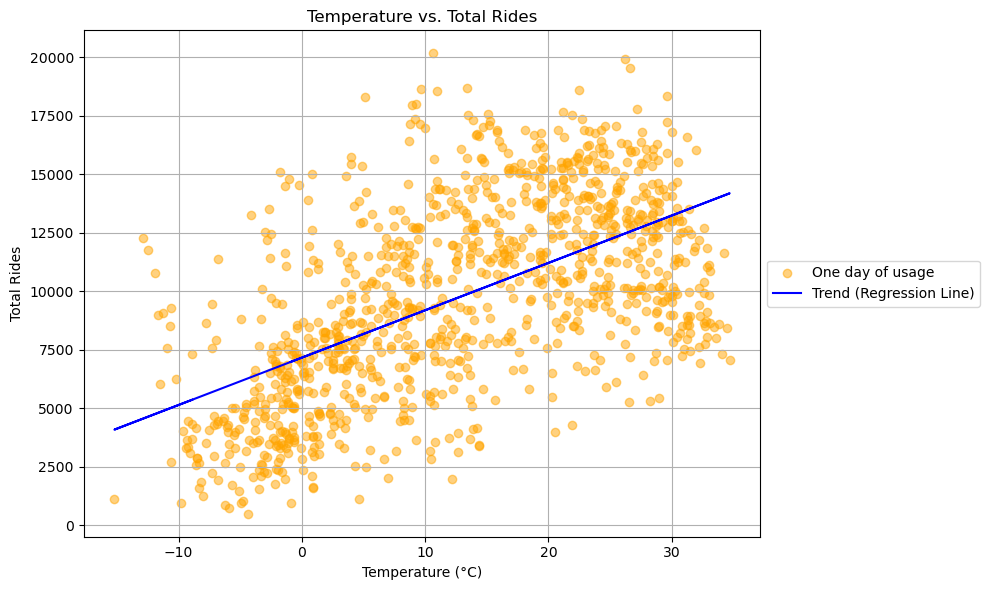

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(df_dailyweather['apparent_temperature_mean_(°c)'], 
            df_dailyweather['total_rides'], 
            alpha=0.5, color='orange', label='One day of usage')

x = df_dailyweather['apparent_temperature_mean_(°c)']
y = df_dailyweather['total_rides']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label='Trend (Regression Line)')

plt.title('Temperature vs. Total Rides')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.grid(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


#### Holidays in Washingtone and how it affects it

In [29]:
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'total_users'],
      dtype='object')

In [30]:
df_dailyweather.head()

,casual,date,member,total_rides,apparent_temperature_mean_(°c),temperature_2m_mean_(°c),weathercode_(wmo code),windspeed_10m_max_(km/h),year,month,weekday,day_type,holiday,is_holiday,season,season_name,weather_desc,total_users
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,1,Friday,Weekday,1,Yes,1,Winter,Moderate rain,961
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,1,Saturday,Weekend,0,No,1,Winter,Slight rain,5718
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,1,Sunday,Weekend,0,No,1,Winter,Moderate rain,1628
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,1,Monday,Weekday,0,No,1,Winter,Overcast,2981
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,1,Tuesday,Weekday,0,No,1,Winter,Light drizzle,3061


In [31]:
holiday_weekends = df_dailyweather[(df_dailyweather['holiday'] == 1) & (df_dailyweather['day_type'] == 'Weekend')]
print(f"Number of holiday weekend days: {holiday_weekends.shape[0]}")


Number of holiday weekend days: 8


In [32]:
holiday_days_2023 = df_dailyweather[
    (df_dailyweather['year'] == 2023) & 
    (df_dailyweather['holiday'] == 1)
]['date'].dt.date.nunique()

print(f"Number of unique holiday days in 2023: {holiday_days_2023}")


Number of unique holiday days in 2023: 13


In [33]:
print(df_dailyweather['year'].value_counts())
print('=================')
print('=================')
print('=================')
print('=================')
print(df_dailyweather[df_dailyweather['holiday'] == 1]['date'].dt.date.nunique())
print('=================')
print('=================')
print('=================')
print('=================')
print(df_dailyweather[df_dailyweather['holiday'] == 1]['date'].dt.date.head(20))
print('=================')
print('=================')
print('=================')
print('=================')
weekend_holidays = df_dailyweather[(df_dailyweather['holiday'] == 1) & (df_dailyweather['weekday'].isin(['Saturday', 'Sunday']))]
print(len(weekend_holidays))



year
2021    365
2022    365
2023    365
Name: count, dtype: int64
41
0      2021-01-01
17     2021-01-18
45     2021-02-15
150    2021-05-31
168    2021-06-18
169    2021-06-19
184    2021-07-04
185    2021-07-05
248    2021-09-06
283    2021-10-11
314    2021-11-11
328    2021-11-25
357    2021-12-24
358    2021-12-25
364    2021-12-31
365    2022-01-01
381    2022-01-17
416    2022-02-21
514    2022-05-30
534    2022-06-19
Name: date, dtype: object
8


Average users on holidays: 4460.93
Average users on non-holidays: 5986.62
Percent change: -25.49%


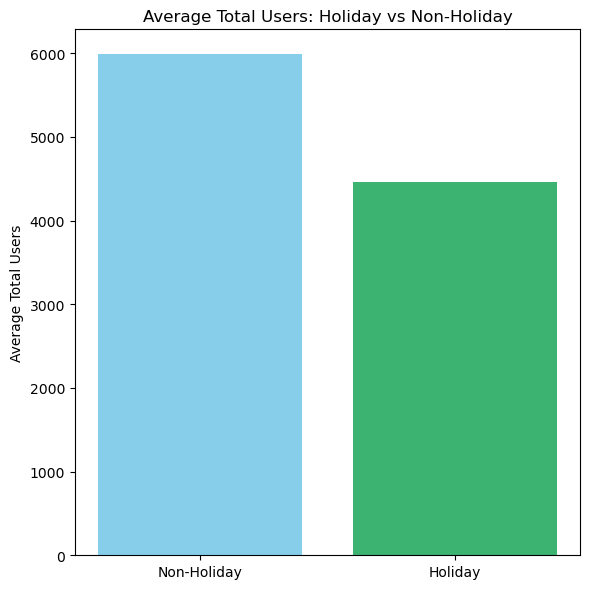

In [34]:
# df_dailyweather['total_users'] = df_dailyweather['casual'] + df_dailyweather['member']

# Split into holiday and non-holiday
holiday_avg = df_dailyweather[df_dailyweather['holiday'] == 1]['member'].mean()
non_holiday_avg = df_dailyweather[df_dailyweather['holiday'] != 1]['member'].mean()

# Calculate percent change
percent_change = ((holiday_avg - non_holiday_avg) / non_holiday_avg) * 100

print(f"Average users on holidays: {holiday_avg:.2f}")
print(f"Average users on non-holidays: {non_holiday_avg:.2f}")
print(f"Percent change: {percent_change:.2f}%")

labels = ['Non-Holiday', 'Holiday']
values = [non_holiday_avg, holiday_avg]

plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['skyblue', 'mediumseagreen'])
plt.title('Average Total Users: Holiday vs Non-Holiday')
plt.ylabel('Average Total Users')
plt.tight_layout()
plt.show()



In [35]:
df_dailyweather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_(°c)', 'temperature_2m_mean_(°c)',
       'weathercode_(wmo code)', 'windspeed_10m_max_(km/h)', 'year', 'month',
       'weekday', 'day_type', 'holiday', 'is_holiday', 'season', 'season_name',
       'weather_desc', 'total_users'],
      dtype='object')

In [36]:
# Hourly Trend on holidays vs normal days. 
# if it is holiday do we have more casual?
